In [1]:
import tensorflow as tf

import numpy as np
import keras
import wget
from pathlib import Path
import tensorflow_io as tfio

from keras.models import load_model
from keras.models import model_from_json

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from src.utils import *
from src.model import *
from src.train import *
import seaborn as sns

%matplotlib inline

tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

# modelname = 'frozen_encoder/step6_fulltune_bs16_300epochs_lr5e4'
modelname = 'frozen_last4_encoder/step5_fulltune_bs16_300epochs_lr5e4'
# modelname = 'fulltune/step3_bs8_200epochs_lr1e3'


2024-12-03 21:35:44.711544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 21:35:44.904451: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 21:35:45.812467: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-12-03 21:35:45.812539: W tensorflow/

In [ ]:
image_list = ['./inputs/AC42132bb-AC4213690-CT.dcm',
'./inputs/AC42132bc-AC42164ba-CT.dcm',
'./inputs/AC4213342-AC4213717-CT.dcm',
'./inputs/AC4213402-AC42137d8-CT.dcm',
'./inputs/AC4213416-AC42137ec-CT.dcm',
'./inputs/AC4213422-AC42137f9-CT.dcm',
'./inputs/AC4213461-AC4213839-CT.dcm',
'./inputs/AC42134ec-AC42138c7-CT.dcm',
'./inputs/AC4213a71-AC4213e2b-CT.dcm',
'./inputs/AC4213af5-AC4213eb5-CT.dcm',
'./inputs/AC421420b-AC4243aec-CT.dcm',
'./inputs/AC421427b-AC4214618-CT.dcm',
'./inputs/AC42142d6-AC4243063-CT.dcm',
'./inputs/AC42142f9-AC421469e-CT.dcm',
'./inputs/AC4214306-AC423f75a-CT.dcm',
'./inputs/AC421439b-AC4214750-CT.dcm',
'./inputs/AC4214412-AC42147d2-CT.dcm',
'./inputs/AC4214947-AC4214ccd-CT.dcm',
'./inputs/AC4214a78-AC4214e1f-CT.dcm',
'./inputs/AC4214bfb-AC4214fcf-CT.dcm',
'./inputs/AC4215183-AC4215506-CT.dcm',
'./inputs/AC4215221-AC42155bc-CT.dcm',
'./inputs/AC4215255-AC42155f7-CT.dcm',
'./inputs/AC4215279-AC421561e-CT.dcm',
'./inputs/AC4215897-AC4215bec-CT.dcm',
'./inputs/AC42158a1-AC4240972-CT.dcm',
'./inputs/AC4215999-AC4215d1b-CT.dcm',
'./inputs/AC42159ce-AC4215d52-CT.dcm',
'./inputs/AC4215a72-AC42439ee-CT.dcm',
'./inputs/AC4215a9a-AC4215e57-CT.dcm',
'./inputs/AC4215f4b-AC4216298-CT.dcm',
'./inputs/AC4216026-AC4216397-CT.dcm',
'./inputs/AC4216057-AC42163d0-CT.dcm',
'./inputs/AC4216186-AC4216545-CT.dcm',
'./inputs/AC42161e7-AC42165ba-CT.dcm',
'./inputs/AC4216644-AC421696b-CT.dcm',
'./inputs/AC4216651-AC421697b-CT.dcm',
'./inputs/AC4216727-AC4216a7e-CT.dcm',
'./inputs/AC4216745-AC4216a9d-CT.dcm',
'./inputs/AC421675d-AC4216ac0-CT.dcm',
'./inputs/AC42167a1-AC4216b14-CT.dcm',
'./inputs/AC421681d-AC4216bab-CT.dcm',
'./inputs/AC42168a7-AC4216c5b-CT.dcm',
'./inputs/AC421690d-AC4216cdd-CT.dcm',
'./inputs/AC4216d54-AC4216dca-CT.dcm',
'./inputs/AC4216d8b-AC4216e14-CT.dcm',
'./inputs/AC423ba9c-AC423bde2-CT.dcm',
'./inputs/AC423bada-AC423be2f-CT.dcm',
'./inputs/AC423bb02-AC423be60-CT.dcm',
'./inputs/AC423bbbe-AC423bf35-CT.dcm',
'./inputs/AC423bbe0-AC423bf5e-CT.dcm',
'./inputs/AC423bcf9-AC423c0b3-CT.dcm',
'./inputs/AC423bd5c-AC423c129-CT.dcm',
'./inputs/AC423bd83-AC42436c3-CT.dcm',
'./inputs/AC423c1ca-AC423c4df-CT.dcm',
'./inputs/AC423c225-AC423c559-CT.dcm',
'./inputs/AC423c27e-AC4243093-CT.dcm',
'./inputs/AC423c293-AC423c5e5-CT.dcm',
'./inputs/AC423c2b4-AC423c614-CT.dcm',
'./inputs/AC423c46c-AC423c847-CT.dcm',
'./inputs/AC423c8fc-AC423cc1c-CT.dcm',
'./inputs/AC423c97c-AC423ccba-CT.dcm',
'./inputs/AC423c9c1-AC423cd0e-CT.dcm',
'./inputs/AC423ca55-AC423cdc7-CT.dcm',
'./inputs/AC423ca9a-AC4240d93-CT.dcm',
'./inputs/AC423cb5d-AC423cf2c-CT.dcm',
'./inputs/AC423cb92-AC423cf72-CT.dcm',
'./inputs/AC423cfb0-AC423e01b-CT.dcm',
'./inputs/AC423cfe7-AC423d2da-CT.dcm',
'./inputs/AC423d09f-AC423d3d6-CT.dcm',
'./inputs/AC423d0b5-AC423d3f5-CT.dcm',
'./inputs/AC423d11f-AC423d47a-CT.dcm',
'./inputs/AC423d13f-AC423d4a4-CT.dcm',
'./inputs/AC423d1dd-AC423d586-CT.dcm',
'./inputs/AC423d1e6-AC423d590-CT.dcm',
'./inputs/AC423d1fb-AC4242755-CT.dcm',
'./inputs/AC423d20c-AC423d5c5-CT.dcm',
'./inputs/AC423d25f-AC423d63f-CT.dcm',
'./inputs/AC423d672-AC4242385-CT.dcm',
'./inputs/AC423d684-AC423d966-CT.dcm',
'./inputs/AC423d7be-AC423db13-CT.dcm',
'./inputs/AC423d825-AC423dbb1-CT.dcm',
'./inputs/AC423d89e-AC423dc53-CT.dcm',
'./inputs/AC423d917-AC423dcfa-CT.dcm',
'./inputs/AC423dd59-AC423e030-CT.dcm',
'./inputs/AC423dd5f-AC423e03a-CT.dcm',
'./inputs/AC423dd96-AC423e089-CT.dcm',
'./inputs/AC423dda4-AC423e097-CT.dcm',
'./inputs/AC423de2c-AC423e167-CT.dcm',
'./inputs/AC423de32-AC423e170-CT.dcm',
'./inputs/AC423de52-AC423e19f-CT.dcm',
'./inputs/AC423df13-AC423e2b9-CT.dcm',
'./inputs/AC423df5d-AC423e323-CT.dcm',
'./inputs/AC423df62-AC423e32b-CT.dcm',
'./inputs/AC423dfb2-AC423e398-CT.dcm',
'./inputs/AC423e3ea-AC423e6c1-CT.dcm',
'./inputs/AC423e4c1-AC423e7f3-CT.dcm',
'./inputs/AC423e4da-AC423e813-CT.dcm',
'./inputs/AC423e4f9-AC423e842-CT.dcm',
'./inputs/AC423e5b7-AC423e952-CT.dcm',
'./inputs/AC423e5e8-AC423e99e-CT.dcm',
'./inputs/AC423eb19-AC423ee23-CT.dcm',
'./inputs/AC423eb42-AC423ee5c-CT.dcm',
'./inputs/AC423ebd3-AC423ef2b-CT.dcm',
'./inputs/AC423ec69-AC423f006-CT.dcm',
'./inputs/AC423ec9e-AC423f058-CT.dcm',
'./inputs/AC423ecf1-AC423f0d0-CT.dcm',
'./inputs/AC423f244-AC42426f6-CT.dcm',
'./inputs/AC423f283-AC423f5e6-CT.dcm',
'./inputs/AC423f2fc-AC423f696-CT.dcm',
'./inputs/AC423f7f2-AC423fac4-CT.dcm',
'./inputs/AC423f823-AC423fb13-CT.dcm',
'./inputs/AC423f82b-AC423fb1c-CT.dcm',
'./inputs/AC423f867-AC423fb77-CT.dcm',
'./inputs/AC423f87c-AC423fb94-CT.dcm',
'./inputs/AC423f8a0-AC423fbc5-CT.dcm',
'./inputs/AC423f910-AC423fc64-CT.dcm',
'./inputs/AC423f912-AC423fc66-CT.dcm',
'./inputs/AC423f91c-AC423fc75-CT.dcm',
'./inputs/AC423f92e-AC423fc8c-CT.dcm',
'./inputs/AC423f9bf-AC423fd7c-CT.dcm',
'./inputs/AC423f9da-AC423fda3-CT.dcm',
'./inputs/AC423fe3a-AC42400ef-CT.dcm',
'./inputs/AC423ffce-AC4240331-CT.dcm',
'./inputs/AC4240050-AC4240407-CT.dcm',
'./inputs/AC42404af-AC4240752-CT.dcm',
'./inputs/AC4240502-AC42407d4-CT.dcm',
'./inputs/AC424052b-AC424080c-CT.dcm',
'./inputs/AC4240590-AC42408b6-CT.dcm',
'./inputs/AC42405b2-AC42408e8-CT.dcm',
'./inputs/AC42405bd-AC42408f5-CT.dcm',
'./inputs/AC42405d9-AC42453d8-CT.dcm',
'./inputs/AC424062b-AC424099e-CT.dcm',
'./inputs/AC4240686-AC4240a2a-CT.dcm',
'./inputs/AC4240be6-AC4240ee5-CT.dcm',
'./inputs/AC4240c99-AC424100e-CT.dcm',
'./inputs/AC4240c9a-AC4241010-CT.dcm',
'./inputs/AC4241141-AC42413cc-CT.dcm',
'./inputs/AC4241237-AC4241541-CT.dcm',
'./inputs/AC4241355-AC42416fc-CT.dcm',
'./inputs/AC4241370-AC424171f-CT.dcm',
'./inputs/AC4241380-AC424173e-CT.dcm',
'./inputs/AC4241891-AC4241b8d-CT.dcm',
'./inputs/AC4241908-AC4241c4f-CT.dcm',
'./inputs/AC424193b-AC4241ca2-CT.dcm',
'./inputs/AC424193d-AC4241ca4-CT.dcm',
'./inputs/AC424194b-AC4241cbb-CT.dcm',
'./inputs/AC42419c1-AC4241d7c-CT.dcm',
'./inputs/AC42419e6-AC4241db6-CT.dcm',
'./inputs/AC42419e9-AC4241dbb-CT.dcm',
'./inputs/AC42419f4-AC4241dc7-CT.dcm',
'./inputs/AC4241eef-AC42421f1-CT.dcm',
'./inputs/AC4241f0b-AC424546b-CT.dcm',
'./inputs/AC4241fad-AC4242327-CT.dcm',
'./inputs/AC4241fb0-AC424232f-CT.dcm',
'./inputs/AC4241fff-AC42423a6-CT.dcm',
'./inputs/AC424201d-AC42423db-CT.dcm',
'./inputs/AC424202d-AC42423f9-CT.dcm',
'./inputs/AC4242030-AC4242400-CT.dcm',
'./inputs/AC424244a-AC42426be-CT.dcm',
'./inputs/AC424248d-AC424272c-CT.dcm',
'./inputs/AC42424cd-AC4242793-CT.dcm',
'./inputs/AC424255a-AC4242886-CT.dcm',
'./inputs/AC4242575-AC42428ba-CT.dcm',
'./inputs/AC424257b-AC42428c4-CT.dcm',
'./inputs/AC42425a2-AC4242905-CT.dcm',
'./inputs/AC42425a9-AC4242914-CT.dcm',
'./inputs/AC42425ad-AC4242922-CT.dcm',
'./inputs/AC42425d3-AC424295b-CT.dcm',
'./inputs/AC42425e1-AC4242971-CT.dcm',
'./inputs/AC424265f-AC424351e-CT.dcm',
'./inputs/AC4242ad6-AC4242d5c-CT.dcm',
'./inputs/AC4242c01-AC4242f43-CT.dcm',
'./inputs/AC42430ee-AC424335e-CT.dcm',
'./inputs/AC4243244-AC42435aa-CT.dcm',
'./inputs/AC42432ab-AC424365c-CT.dcm',
'./inputs/AC42432b2-AC424366b-CT.dcm',
'./inputs/AC4243806-AC4243b1f-CT.dcm',
'./inputs/AC4243880-AC4243bff-CT.dcm',
'./inputs/AC424388d-AC4243c15-CT.dcm',
'./inputs/AC42438a5-AC4243c41-CT.dcm',
'./inputs/AC42438cf-AC4243c93-CT.dcm',
'./inputs/AC4243e01-AC4244115-CT.dcm',
'./inputs/AC4243e22-AC424415a-CT.dcm',
'./inputs/AC4243e45-AC42441a0-CT.dcm',
'./inputs/AC4243e91-AC424420d-CT.dcm',
'./inputs/AC424436b-AC42445de-CT.dcm',
'./inputs/AC4244384-AC4244608-CT.dcm',
'./inputs/AC4244430-AC4244742-CT.dcm',
'./inputs/AC424443b-AC4244757-CT.dcm',
'./inputs/AC4244451-AC4244778-CT.dcm',
'./inputs/AC42444ed-AC424488e-CT.dcm',
'./inputs/AC4244956-AC4244b95-CT.dcm',
'./inputs/AC424496f-AC4244bc7-CT.dcm',
'./inputs/AC42449e6-AC4244cad-CT.dcm',
'./inputs/AC4244a1d-AC4244d10-CT.dcm',
'./inputs/AC4244a89-AC4244dc8-CT.dcm',
'./inputs/AC4244aed-AC4244e7a-CT.dcm',
]

In [ ]:
mask_list = ['./labels/AC42132bb-AC4213690.dcm',
'./labels/AC42132bc-AC42164ba.dcm',
'./labels/AC4213342-AC4213717.dcm',
'./labels/AC4213402-AC42137d8.dcm',
'./labels/AC4213416-AC42137ec.dcm',
'./labels/AC4213422-AC42137f9.dcm',
'./labels/AC4213461-AC4213839.dcm',
'./labels/AC42134ec-AC42138c7.dcm',
'./labels/AC4213a71-AC4213e2b.dcm',
'./labels/AC4213af5-AC4213eb5.dcm',
'./labels/AC421420b-AC4243aec.dcm',
'./labels/AC421427b-AC4214618.dcm',
'./labels/AC42142d6-AC4243063.dcm',
'./labels/AC42142f9-AC421469e.dcm',
'./labels/AC4214306-AC423f75a.dcm',
'./labels/AC421439b-AC4214750.dcm',
'./labels/AC4214412-AC42147d2.dcm',
'./labels/AC4214947-AC4214ccd.dcm',
'./labels/AC4214a78-AC4214e1f.dcm',
'./labels/AC4214bfb-AC4214fcf.dcm',
'./labels/AC4215183-AC4215506.dcm',
'./labels/AC4215221-AC42155bc.dcm',
'./labels/AC4215255-AC42155f7.dcm',
'./labels/AC4215279-AC421561e.dcm',
'./labels/AC4215897-AC4215bec.dcm',
'./labels/AC42158a1-AC4240972.dcm',
'./labels/AC4215999-AC4215d1b.dcm',
'./labels/AC42159ce-AC4215d52.dcm',
'./labels/AC4215a72-AC42439ee.dcm',
'./labels/AC4215a9a-AC4215e57.dcm',
'./labels/AC4215f4b-AC4216298.dcm',
'./labels/AC4216026-AC4216397.dcm',
'./labels/AC4216057-AC42163d0.dcm',
'./labels/AC4216186-AC4216545.dcm',
'./labels/AC42161e7-AC42165ba.dcm',
'./labels/AC4216644-AC421696b.dcm',
'./labels/AC4216651-AC421697b.dcm',
'./labels/AC4216727-AC4216a7e.dcm',
'./labels/AC4216745-AC4216a9d.dcm',
'./labels/AC421675d-AC4216ac0.dcm',
'./labels/AC42167a1-AC4216b14.dcm',
'./labels/AC421681d-AC4216bab.dcm',
'./labels/AC42168a7-AC4216c5b.dcm',
'./labels/AC421690d-AC4216cdd.dcm',
'./labels/AC4216d54-AC4216dca.dcm',
'./labels/AC4216d8b-AC4216e14.dcm',
'./labels/AC423ba9c-AC423bde2.dcm',
'./labels/AC423bada-AC423be2f.dcm',
'./labels/AC423bb02-AC423be60.dcm',
'./labels/AC423bbbe-AC423bf35.dcm',
'./labels/AC423bbe0-AC423bf5e.dcm',
'./labels/AC423bcf9-AC423c0b3.dcm',
'./labels/AC423bd5c-AC423c129.dcm',
'./labels/AC423bd83-AC42436c3.dcm',
'./labels/AC423c1ca-AC423c4df.dcm',
'./labels/AC423c225-AC423c559.dcm',
'./labels/AC423c27e-AC4243093.dcm',
'./labels/AC423c293-AC423c5e5.dcm',
'./labels/AC423c2b4-AC423c614.dcm',
'./labels/AC423c46c-AC423c847.dcm',
'./labels/AC423c8fc-AC423cc1c.dcm',
'./labels/AC423c97c-AC423ccba.dcm',
'./labels/AC423c9c1-AC423cd0e.dcm',
'./labels/AC423ca55-AC423cdc7.dcm',
'./labels/AC423ca9a-AC4240d93.dcm',
'./labels/AC423cb5d-AC423cf2c.dcm',
'./labels/AC423cb92-AC423cf72.dcm',
'./labels/AC423cfb0-AC423e01b.dcm',
'./labels/AC423cfe7-AC423d2da.dcm',
'./labels/AC423d09f-AC423d3d6.dcm',
'./labels/AC423d0b5-AC423d3f5.dcm',
'./labels/AC423d11f-AC423d47a.dcm',
'./labels/AC423d13f-AC423d4a4.dcm',
'./labels/AC423d1dd-AC423d586.dcm',
'./labels/AC423d1e6-AC423d590.dcm',
'./labels/AC423d1fb-AC4242755.dcm',
'./labels/AC423d20c-AC423d5c5.dcm',
'./labels/AC423d25f-AC423d63f.dcm',
'./labels/AC423d672-AC4242385.dcm',
'./labels/AC423d684-AC423d966.dcm',
'./labels/AC423d7be-AC423db13.dcm',
'./labels/AC423d825-AC423dbb1.dcm',
'./labels/AC423d89e-AC423dc53.dcm',
'./labels/AC423d917-AC423dcfa.dcm',
'./labels/AC423dd59-AC423e030.dcm',
'./labels/AC423dd5f-AC423e03a.dcm',
'./labels/AC423dd96-AC423e089.dcm',
'./labels/AC423dda4-AC423e097.dcm',
'./labels/AC423de2c-AC423e167.dcm',
'./labels/AC423de32-AC423e170.dcm',
'./labels/AC423de52-AC423e19f.dcm',
'./labels/AC423df13-AC423e2b9.dcm',
'./labels/AC423df5d-AC423e323.dcm',
'./labels/AC423df62-AC423e32b.dcm',
'./labels/AC423dfb2-AC423e398.dcm',
'./labels/AC423e3ea-AC423e6c1.dcm',
'./labels/AC423e4c1-AC423e7f3.dcm',
'./labels/AC423e4da-AC423e813.dcm',
'./labels/AC423e4f9-AC423e842.dcm',
'./labels/AC423e5b7-AC423e952.dcm',
'./labels/AC423e5e8-AC423e99e.dcm',
'./labels/AC423eb19-AC423ee23.dcm',
'./labels/AC423eb42-AC423ee5c.dcm',
'./labels/AC423ebd3-AC423ef2b.dcm',
'./labels/AC423ec69-AC423f006.dcm',
'./labels/AC423ec9e-AC423f058.dcm',
'./labels/AC423ecf1-AC423f0d0.dcm',
'./labels/AC423f244-AC42426f6.dcm',
'./labels/AC423f283-AC423f5e6.dcm',
'./labels/AC423f2fc-AC423f696.dcm',
'./labels/AC423f7f2-AC423fac4.dcm',
'./labels/AC423f823-AC423fb13.dcm',
'./labels/AC423f82b-AC423fb1c.dcm',
'./labels/AC423f867-AC423fb77.dcm',
'./labels/AC423f87c-AC423fb94.dcm',
'./labels/AC423f8a0-AC423fbc5.dcm',
'./labels/AC423f910-AC423fc64.dcm',
'./labels/AC423f912-AC423fc66.dcm',
'./labels/AC423f91c-AC423fc75.dcm',
'./labels/AC423f92e-AC423fc8c.dcm',
'./labels/AC423f9bf-AC423fd7c.dcm',
'./labels/AC423f9da-AC423fda3.dcm',
'./labels/AC423fe3a-AC42400ef.dcm',
'./labels/AC423ffce-AC4240331.dcm',
'./labels/AC4240050-AC4240407.dcm',
'./labels/AC42404af-AC4240752.dcm',
'./labels/AC4240502-AC42407d4.dcm',
'./labels/AC424052b-AC424080c.dcm',
'./labels/AC4240590-AC42408b6.dcm',
'./labels/AC42405b2-AC42408e8.dcm',
'./labels/AC42405bd-AC42408f5.dcm',
'./labels/AC42405d9-AC42453d8.dcm',
'./labels/AC424062b-AC424099e.dcm',
'./labels/AC4240686-AC4240a2a.dcm',
'./labels/AC4240be6-AC4240ee5.dcm',
'./labels/AC4240c99-AC424100e.dcm',
'./labels/AC4240c9a-AC4241010.dcm',
'./labels/AC4241141-AC42413cc.dcm',
'./labels/AC4241237-AC4241541.dcm',
'./labels/AC4241355-AC42416fc.dcm',
'./labels/AC4241370-AC424171f.dcm',
'./labels/AC4241380-AC424173e.dcm',
'./labels/AC4241891-AC4241b8d.dcm',
'./labels/AC4241908-AC4241c4f.dcm',
'./labels/AC424193b-AC4241ca2.dcm',
'./labels/AC424193d-AC4241ca4.dcm',
'./labels/AC424194b-AC4241cbb.dcm',
'./labels/AC42419c1-AC4241d7c.dcm',
'./labels/AC42419e6-AC4241db6.dcm',
'./labels/AC42419e9-AC4241dbb.dcm',
'./labels/AC42419f4-AC4241dc7.dcm',
'./labels/AC4241eef-AC42421f1.dcm',
'./labels/AC4241f0b-AC424546b.dcm',
'./labels/AC4241fad-AC4242327.dcm',
'./labels/AC4241fb0-AC424232f.dcm',
'./labels/AC4241fff-AC42423a6.dcm',
'./labels/AC424201d-AC42423db.dcm',
'./labels/AC424202d-AC42423f9.dcm',
'./labels/AC4242030-AC4242400.dcm',
'./labels/AC424244a-AC42426be.dcm',
'./labels/AC424248d-AC424272c.dcm',
'./labels/AC42424cd-AC4242793.dcm',
'./labels/AC424255a-AC4242886.dcm',
'./labels/AC4242575-AC42428ba.dcm',
'./labels/AC424257b-AC42428c4.dcm',
'./labels/AC42425a2-AC4242905.dcm',
'./labels/AC42425a9-AC4242914.dcm',
'./labels/AC42425ad-AC4242922.dcm',
'./labels/AC42425d3-AC424295b.dcm',
'./labels/AC42425e1-AC4242971.dcm',
'./labels/AC424265f-AC424351e.dcm',
'./labels/AC4242ad6-AC4242d5c.dcm',
'./labels/AC4242c01-AC4242f43.dcm',
'./labels/AC42430ee-AC424335e.dcm',
'./labels/AC4243244-AC42435aa.dcm',
'./labels/AC42432ab-AC424365c.dcm',
'./labels/AC42432b2-AC424366b.dcm',
'./labels/AC4243806-AC4243b1f.dcm',
'./labels/AC4243880-AC4243bff.dcm',
'./labels/AC424388d-AC4243c15.dcm',
'./labels/AC42438a5-AC4243c41.dcm',
'./labels/AC42438cf-AC4243c93.dcm',
'./labels/AC4243e01-AC4244115.dcm',
'./labels/AC4243e22-AC424415a.dcm',
'./labels/AC4243e45-AC42441a0.dcm',
'./labels/AC4243e91-AC424420d.dcm',
'./labels/AC424436b-AC42445de.dcm',
'./labels/AC4244384-AC4244608.dcm',
'./labels/AC4244430-AC4244742.dcm',
'./labels/AC424443b-AC4244757.dcm',
'./labels/AC4244451-AC4244778.dcm',
'./labels/AC42444ed-AC424488e.dcm',
'./labels/AC4244956-AC4244b95.dcm',
'./labels/AC424496f-AC4244bc7.dcm',
'./labels/AC42449e6-AC4244cad.dcm',
'./labels/AC4244a1d-AC4244d10.dcm',
'./labels/AC4244a89-AC4244dc8.dcm',
'./labels/AC4244aed-AC4244e7a.dcm',
]

In [ ]:
processed_img_ds_train, processed_image_ds_val, processed_image_ds_test = load_muscle_data(image_list, mask_list)

2024-12-03 21:31:05.086292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 21:31:06.198704: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46694 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:4f:00.0, compute capability: 8.6
2024-12-03 21:31:06.199954: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46694 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:ce:00.0, compute capability: 8.6


In [ ]:
BATCH_SIZE = 16
BUFFER_SIZE = 500

model = load_model(f'model_{modelname}.keras', custom_objects={"dice_coef_multilabel": dice_coef_multilabel})
model.trainable = False


train_dataset = processed_img_ds_train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = processed_image_ds_val.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

2024-12-03 21:32:03.263725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204


1/1 [==============================] - 0s 38ms/step


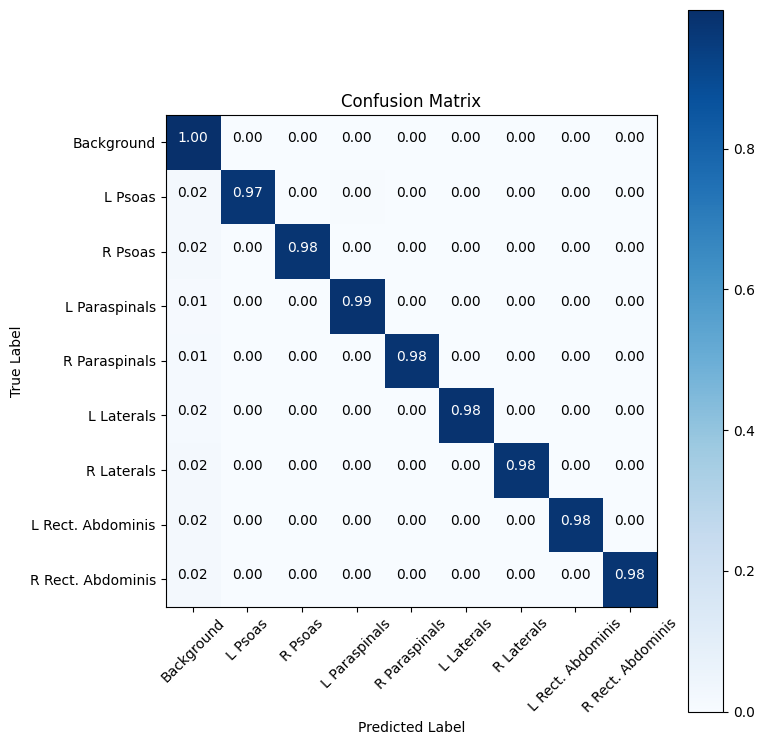

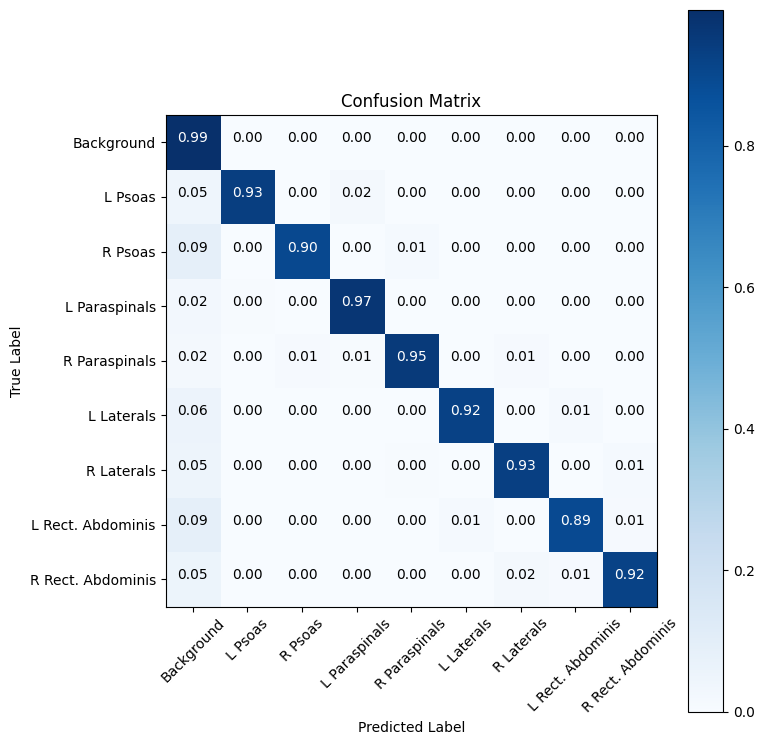

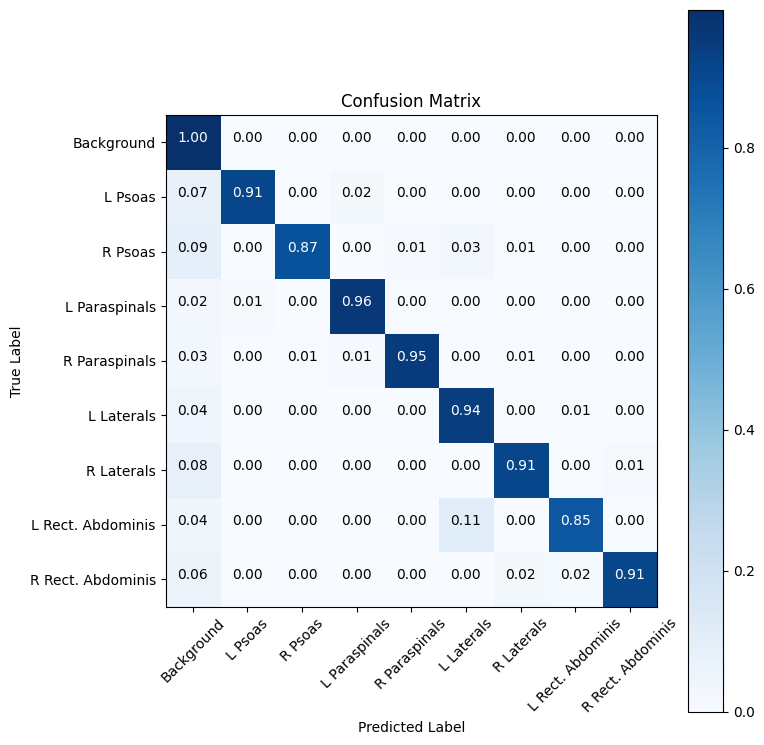

In [ ]:
labels = ['train', 'val', 'test']
datasets = [processed_img_ds_train, processed_image_ds_val, processed_image_ds_test]
for i in range(3):
    plot_confusion_matrix(datasets[i], model, save_figure=True, figname=f'./figures/{modelname}_cm_{labels[i]}')

1/1 [==============================] - 0s 37ms/step
worst 5 losses [-0.68958795 -0.77283359 -0.82852894 -0.87785035 -0.89995307]
1/1 [==============================] - 1s 718ms/step
(1, 512, 512, 1)
dict_keys(['save_figure', 'figname'])
saving figure ./figures/frozen_encoder/step6_fulltune_bs16_300epochs_lr5e4_worst_val_0
1/1 [==============================] - 0s 28ms/step
(1, 512, 512, 1)
dict_keys(['save_figure', 'figname'])
saving figure ./figures/frozen_encoder/step6_fulltune_bs16_300epochs_lr5e4_worst_val_1
1/1 [==============================] - 0s 23ms/step
(1, 512, 512, 1)
dict_keys(['save_figure', 'figname'])
saving figure ./figures/frozen_encoder/step6_fulltune_bs16_300epochs_lr5e4_worst_val_2
1/1 [==============================] - 0s 33ms/step
(1, 512, 512, 1)
dict_keys(['save_figure', 'figname'])
saving figure ./figures/frozen_encoder/step6_fulltune_bs16_300epochs_lr5e4_worst_val_3
1/1 [==============================] - 0s 29ms/step
(1, 512, 512, 1)
dict_keys(['save_figure',

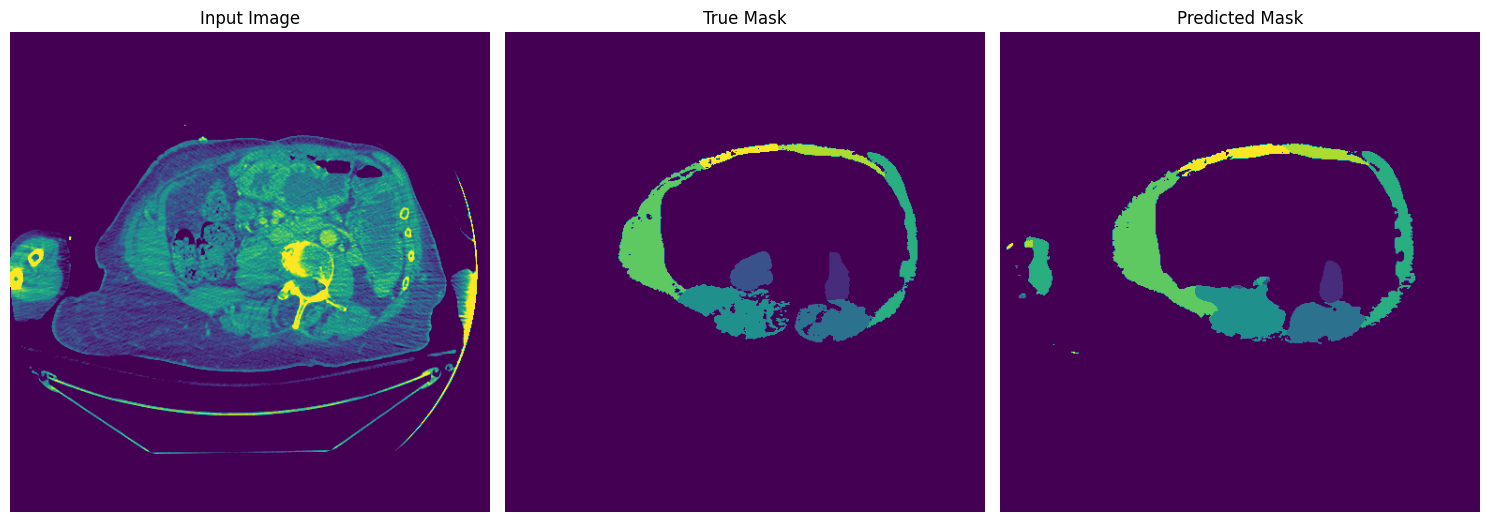

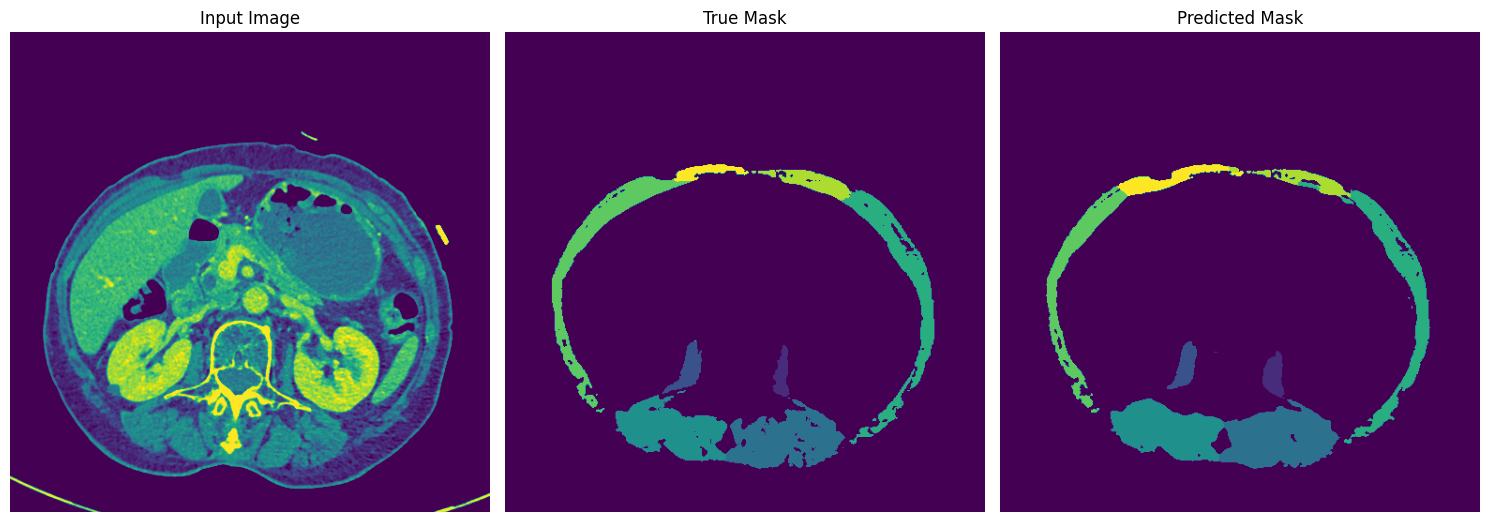

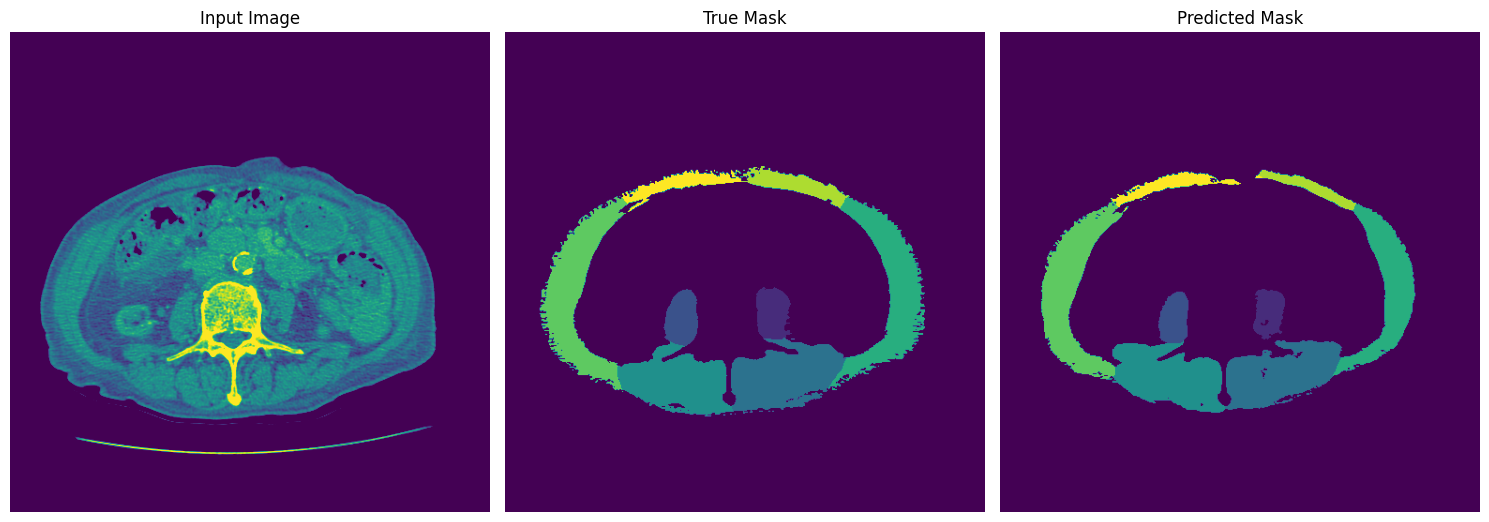

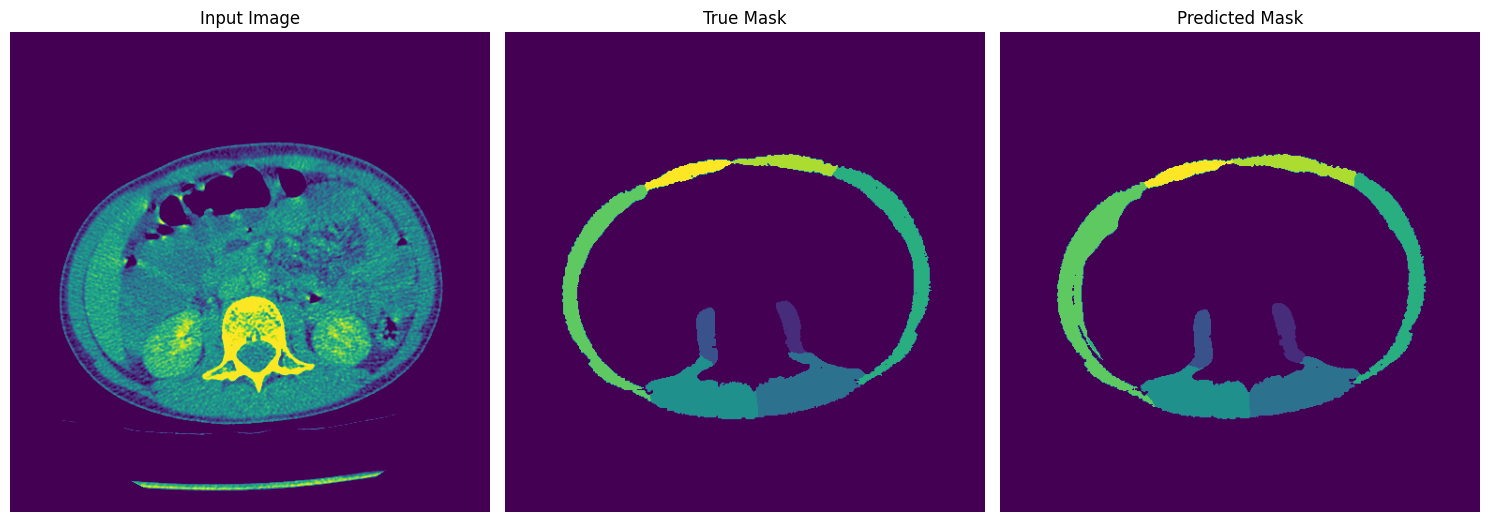

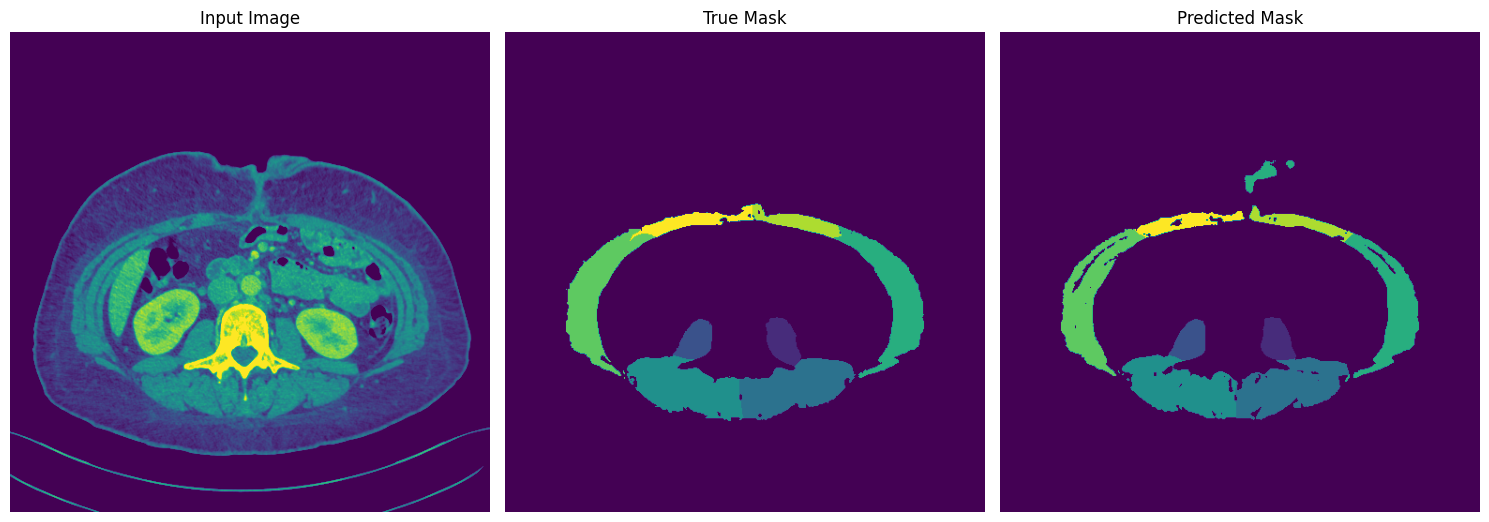

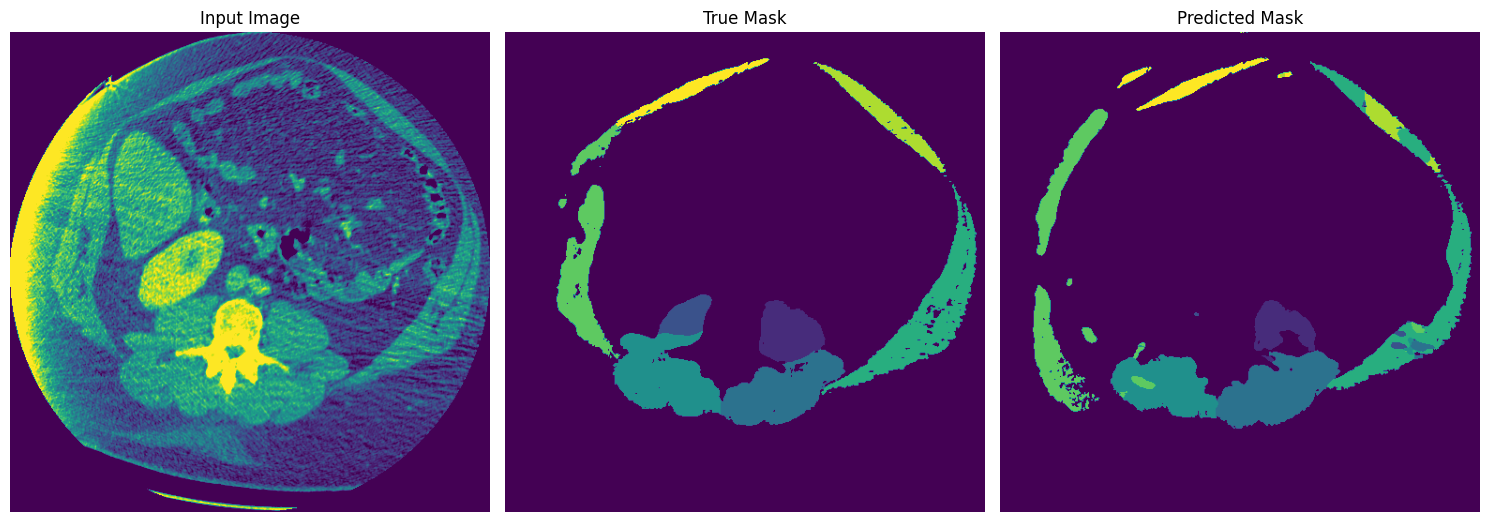

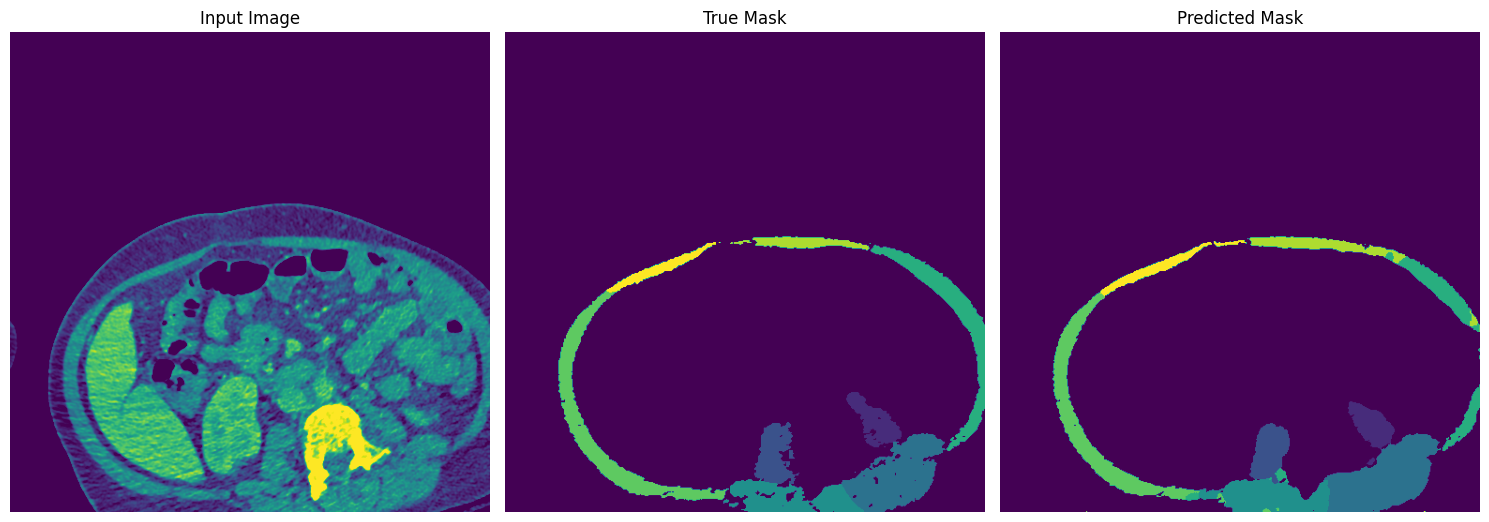

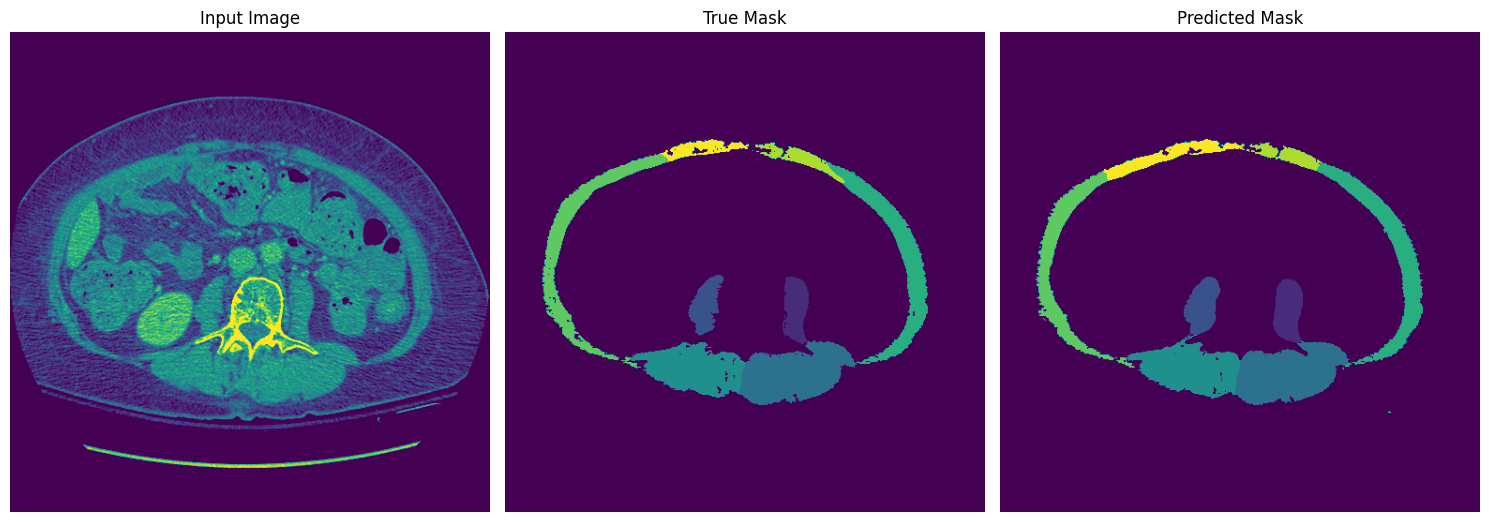

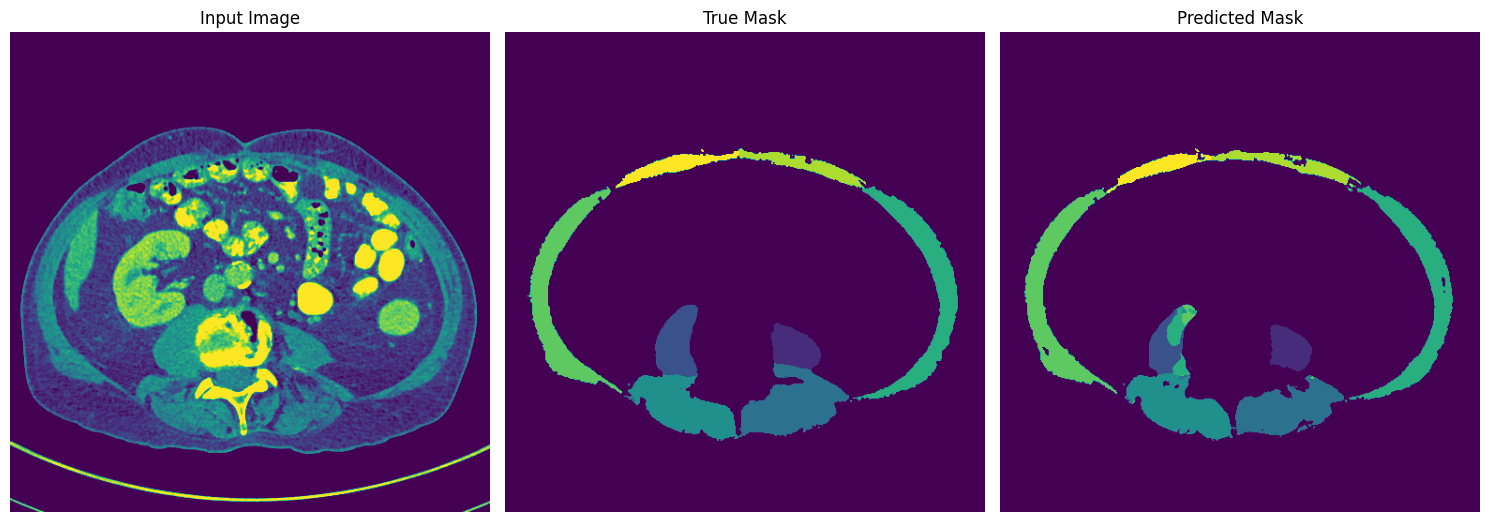

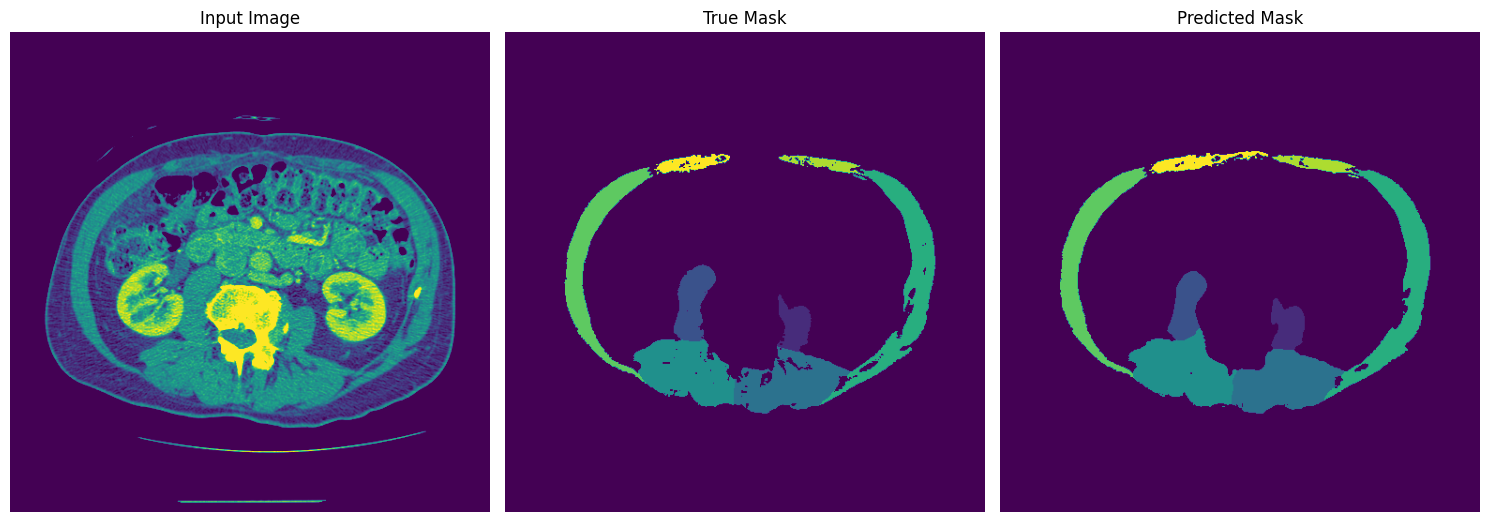

In [ ]:
worst_per_examples(model, processed_image_ds_val, save_figure=True, figname=f'./figures/{modelname}_worst_{labels[1]}')
worst_per_examples(model, processed_image_ds_test, save_figure=True, figname=f'./figures/{modelname}_worst_{labels[2]}')


1/1 [==============================] - 0s 42ms/step


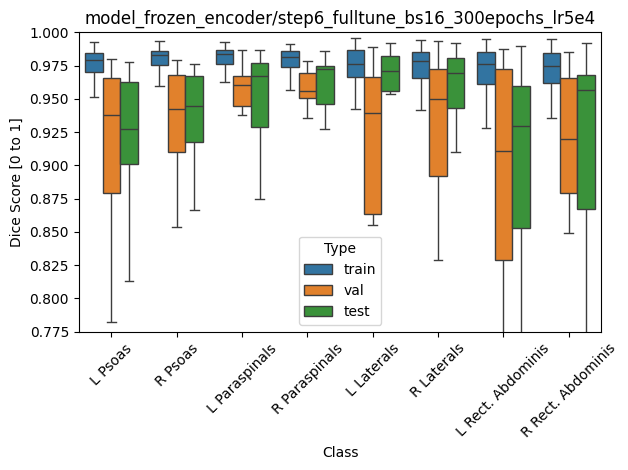

In [ ]:
plot_boxplots(model, datasets, labels, modelname, save_figure=True)